In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
train = pd.read_csv("./train.csv")
features = train.drop(columns="quality")
print(features.keys())
keys = ["type", "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [67]:
dim = len(keys)

In [68]:
X_label = np.ndarray(shape=(dim,len(features)),dtype=float)

# for i in range(len(features)):
#     X_label[0][i] = 1.0
for d, key in enumerate(keys):
    X_label[d] = [x if x != "red" and x != "white" else (1.0 if x == "red" else 0.0) for x in features[key].values]

Y_label = train["quality"].values
Y_label = Y_label.reshape((1,len(Y_label)))

X_label = X_label.transpose() # train_test_splitするために転置を取る
Y_label = Y_label.transpose() # train_test_splitするために転置を取る
# print(X_label.shape,X_label)
# print(Y_label.shape,Y_label)

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X_label, Y_label,test_size=0.4)
# X_train = X_train.transpose()
# X_test = X_test.transpose()
# Y_train = Y_train.transpose()
# Y_test = Y_test.transpose()
# print(X_train.shape, X_train)
# print(Y_train.shape, Y_train)
# print(X_test.shape, X_test)
# print(Y_test.shape, Y_test)

In [70]:
lr_train = LinearRegression()

lr_train.fit(np.where(np.isnan(X_train.astype(np.float)), 0, X_train), Y_train)

LinearRegression()

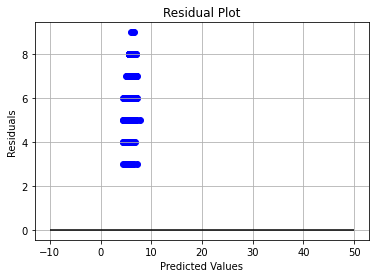

In [71]:
Y_pred = lr_train.predict(np.where(np.isnan(X_test.astype(np.float)), 0, X_test))
plt.scatter(Y_pred, Y_test, color = 'blue')      # 残差をプロット 
plt.hlines(y = 0, xmin = -10, xmax = 50, color = 'black') # x軸に沿った直線をプロット
plt.title('Residual Plot')                                # 図のタイトル
plt.xlabel('Predicted Values')                            # x軸のラベル
plt.ylabel('Residuals')                                   # y軸のラベル
plt.grid()                                                # グリッド線を表示

plt.show()

In [72]:
Y_train_pred = lr_train.predict(np.where(np.isnan(X_train.astype(np.float)), 0, X_train)) # 学習データに対する目的変数を予測
print('MSE train data: ', mean_squared_error(Y_train, Y_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data: ', mean_squared_error(np.where(np.isnan(Y_pred), 0, Y_pred), Y_test))         # 検証データを用いたときの平均二乗誤差を出力

MSE train data:  0.5253022908702905
MSE test data:  0.5655126634006513


In [73]:
# output prediction for the test data
test = pd.read_csv("./test.csv")
test = [[test[key][i] if key != "type" else (1.0 if test[key][i] == "red" else 0.0) for key in keys] for i in range(len(test))]

In [74]:
submission = pd.read_csv("./sample_submission.csv", index_col="id")
submission["quality"] = lr_train.predict(test)
submission.to_csv("submission.csv")